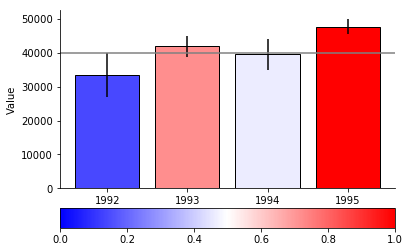

In [3]:
"""
Applied Plotting, Charting & Data Representation in Python
Assignmnet 3
Building a Custom Visualization
"""

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

def get_data(random_seed = 12345):
    """Create data frame with data for visualisation.
    Optional random_seed parameter, defaults to 12345.
    Returns pandas DataFrame object, each column represents a data series.
    """
    np.random.seed(random_seed)

    data_frame = pd.DataFrame([np.random.normal(32000,200000,3650), 
                       np.random.normal(43000,100000,3650), 
                       np.random.normal(43500,140000,3650), 
                       np.random.normal(48000,70000,3650)], 
                      index=[1992,1993,1994,1995])
    df_transpose = data_frame.transpose()

    return df_transpose

def get_stats(data_frame):
    """Calculate mean and 95% confidence interval for input data.
    dat_frame parameter is pandas DataFrame object. Confidence intervals are calulated for
    each seires in data frame and new data frame of calulated stats is returned, containing
    mean, upper and lower 95 confidence intervals.
    Confidence intervals are caluleted using normal inverse cdf.
    """
    n = len(data_frame.index)
    mu = data_frame.apply(np.mean)
    sigma = data_frame.apply(np.std)
    z = 1.96 # normal 95% two-sided quantile

    # half of confidence interval, to be usef on plot
    half_conf_int = z * sigma/math.sqrt(n)

    # create ouptut data frame from dictionary of series
    series_dict = {'mu' : mu, 'half_conf_int' : half_conf_int}

    return pd.DataFrame(series_dict)

def create_barplot(data_frame, value=30000):
    """Create barplot from pandas data frame with confidence intervals plotted. 

    Parameters
    ----------
    data_frame : data frame 
        Data to be plotted. Each colum represents a variable.
    value : float, optional (3000)
        Value to be tested agains. This value is used for drawing
        horizontal line and is used for calulating probilities for 
        each of variables. If not specified, default value of 30000 is used.
    """

    stats_df = get_stats(data_frame)
    probs = data_frame.apply(lambda x: get_prob(x, value))
    
    # Specify plot layout, second plot is from colormap, it will be 20% of total hight
    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[9, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Settin up color scale to be used on plot
    cmap  = mpl.cm.bwr
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cmapper = mpl.cm.ScalarMappable(norm, cmap=cmap)

    # Drawing base plot
    ax1.bar(stats_df.index, stats_df['mu'], yerr=stats_df['half_conf_int'],
            edgecolor='k', color=cmapper.to_rgba(probs))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value')
    ax1.set_xticks(stats_df.index)

    # Draw horizontal line
    ax1.axhline(y=value, color='gray')
    
    # remove top and right plot borders
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Drawing colormap description os ax2
    # remove x axis tics and tic labels
    ax2.set_xticks = None
    ax2.set_yticks([])

    # remove splines from subplot
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # add colormap legend
    _ = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, orientation='horizontal')
    plt.show()

def get_prob(x, value):
    """Calculate probability, of randomly selecting values from random variable,
    that are greater than given value.
    `x` is numpy array, representing random variable.
    Using bootstraping technique, that is randomly selecting values from random variable,
    and calulating percent of values greater than `value` argument.
    The Monte Carlo approach is used, the process of drawing ranodm sample and comparing it to
    the `value` is repeted 10000 times. The frequency of trials, where bootstrap sample mean 
    os greater than value is approximation of probability, that random variable is greater that 
    `value`. Simple sampling with replacements, is used. This allow to generate random samples greater 
    than original sample.
    """

    ITERS = 10000 # number of Monce Carlo Simulations
    BOOT_SIZE = 1000 # bootstrap sample size
    counter = 0 # increment when sample mean greater than value

    for i in range(ITERS):
        x_boot = np.random.choice(x, BOOT_SIZE)
        if np.mean(x_boot) > value: counter += 1

    return float(counter) / ITERS

def main():
   data_frame = get_data()    
   plt.figure()
   create_barplot(data_frame, 40000)

   def onclick(event):
       plt.cla()
       create_barplot(data_frame, event.ydata)

   plt.gcf().canvas.mpl_connect('button_press_event', onclick)

if __name__ == "__main__":
   main()